<a href="https://colab.research.google.com/github/glauciodrumond/Data_Science_Projects/blob/master/Credit__Risk_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Assessment

How about not paying your credit card, loans ... in financial institutions?

Well, this is what you can expect if you don't pay your debts in financial institutions:

* pay late fees, 
* receive increased interest rates, and 
* incur damages to your credit score.

So, if there is a field that gives banks and overall financial institutions more headaches, it is the default rate on the part of their client portfolio.

Assessing whether a client or future client will fail to meet their financial obligations is extremely important, and can have a major impact on the Institution's balance sheet. Increasingly, solutions are being developed and improved to minimize the risk of *default*.

In finance, *default* is the failure to meet the legal obligations (or conditions) of a loan, for example when a home buyer fails to make a mortgage payment. Usually, the main reason for non-compliance with payment terms is the client's financial incapacity.

<p align=center>
  <img src="http://sigmoidal.ai/wp-content/uploads/2019/10/2940191.jpg" height="300px">
</p>

Big banks, financial institutions, and fintech are increasingly using machine learning solutions to avoid or minimize the *default*.

In Brazil, [Nubank](https://nubank.com.br/sobre-nos) is one of the biggest fintech and has stood out in the use of *Artificial Intelligence* and *Data Science* teams.

The data set to be used in this *Data Science* Project is part of a competition held by Startup [Nubank](https://nubank.com.br/sobre-nos) to reveal talent and potential hiring by Fintech.





# Business Problem

In this problem, the objective is to predict how likely it is that a Startup Nubank customer will not meet their financial obligations and fail to pay their Credit Card bill.

It is worth mentioning that this evaluation must be carried out at the moment the customer requests the card (usually at the first contact with the institution).

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>



> GOAL: Create a *Machine Learning* algorithm that provides the likelihood that a customer will default.


# Importing the data

The data that will be used in this project is available for download through [this link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). It basically consists of a `csv` file containing 45,000 entries and 43 columns.

This file will be imported into a *DataFrame* structure using the `pandas` library to allow its manipulation and analysis.



In [0]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# filter warning message
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# load our data in a pandas dataframe
url = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(url)

# Exploratory Analysis


## First impressions

First steps to get to know our data are doing exploratory analysis. We are going to check:
* How many rows(entries) and columns (variables) our data frame has using the attribute .shape
* Check the data type of each columns using the function .dtypes
* Also after this first two steps, we are going to see or data frame first five entries

In [0]:
# dataframe shape
print('Dataframe shape')
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

# show dataframe first 5 rows
print('\nVariables type:')
print(df.dtypes)

Dataframe shape
Rows: 45000
Columns: 43

Variables type:
ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                      

In [0]:
# dataframe first entries
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


> **These are our first impressions in our dataset:**

* The first column in our data frame is `ids`. So for each customer, there is a different id.

* The variables `score_1` and `score_2` are objects, the other's score is float

* We have two variables called target: `target_default` and `target_fraud`. Ahead we will inspect these columns to see what they are really about.

* Some columns coded such as `zip`, `state`, `channel`, and others. We will probably remove these columns.

* `lat_lon` column is a format object contain a tuple with coordinates, we will, later on, create a column for each if necessary.

* The column `profile_tags` is a dictionary.

## Closer look

Now we are going to have a closer look in our dataset checking:

* How much missing data each column have

* Statistical summary of the dataset



In [0]:
# Percent null values
print("\nPercent of missing values:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


Percent of missing values:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015

### Missing values

Ok there is a lot of missing data in our dataset, but look the column that has more missing data (yes, you are right that one on top!) with about 97% missing data:  `target_fraud`

Well, in the beginning, we could think that `target_fraud` was our target variable, but that seems that it is not. Checking this column entries, we can confirm that `target_fraud` is not our variable target. 

Also some columns such as `['last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year']` has more than 50% of missing data.

In [0]:
# Checking target_fraud column
print('\ntarget_fraud column:')
print(df.target_fraud.value_counts())


target_fraud column:
fraud_friends_family    904
fraud_id                618
Name: target_fraud, dtype: int64


### Summary statistics

* `risk_rate` seems to range from 0 to 1, and 75% of the data is below 0.36 and the mean is about 0.3

* `external_data_provider_credit_checks_last_2_year` all entries when not null is zero, bringing no information.

* `reported_income` has entries with **inf** that can interfere in our ML model, so we are going to change `np.inf` to `np.NaN`

* `external_data_provider_email_seen_before` has a strange min value of -999.0, considering the other values. That can be caused by a wrong entry or treated wrong. So we are going to change that value to `np.NaN`

In [0]:
#Summary statistics
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [0]:
# Count of unique values in each column
print ("Unique Values")
print (df.nunique().sort_values())

Unique Values
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44


*  `external_data_provider_credit_checks_last_2_year` and `channel` has only 1 value possible which does not gives us any insight.

* the `state` has 50 different values since Brazil has 26 states plus the Federal District we can assume that some entries are from outside Brazil.

* `shipping_state` we are going to confirm if it's only from Brazilian states since it is 25 differents entries as mentioned before Brazil has 26 states.

* `profile_phone_number` has all entries unique, that does not bring us any insight that can contribute to our analysis.

In [0]:
# Checking our shipping_state
df.shipping_state.value_counts()

BR-SP    6994
BR-AM    4037
BR-BA    2780
BR-GO    2634
BR-RR    1610
BR-MG    1527
BR-SE    1410
BR-DF    1402
BR-MA    1388
BR-RO    1371
BR-TO    1363
BR-PR    1359
BR-MS    1354
BR-RS    1352
BR-AP    1329
BR-PA    1326
BR-AC    1319
BR-AL    1318
BR-SC    1311
BR-PE    1309
BR-PB    1308
BR-RN    1307
BR-MT    1302
BR-CE    1301
BR-ES    1289
Name: shipping_state, dtype: int64

We don't have in the `shipping_states` column the Brazilian states Piaui (Pi) and Rio de Janeiro (RJ). This column is about where the **NuBank** will send the credit card if the applicant got approved.

It is kind strange not having Rio de Janeiro state in our data since Rio de Janeiro over the years it has achieved an extraordinary population increase and is currently the third most populous state in Brazil.

The state of Sao Paulo (SP) is the most with `shipping_state` entries followed by the state of Amazonas (AM) and Espirito Santo (ES) is the state with lower entries.

### Variable target

Since we eliminated the possibilities of our column `target_fraud` being our target variable we are going to inspect the column `target_default` to see how to balance our column is and check how many null values we have.

Number of defaults
False    35080
True      6661
Name: target_default, dtype: int64

True = 14.8022% of the dataset
False = 77.9556% of the dataset


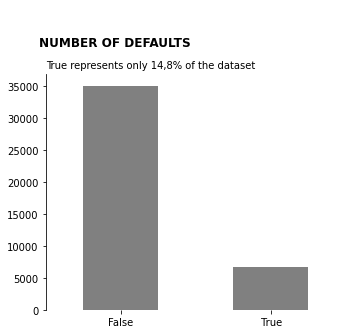

In [0]:
# plot bar chart showing number class types
# gera grafico de barra mostrando numero fraudes

fig, ax = plt.subplots(figsize=(5,4))
name = [ "False"," True"]
ax = df.target_default.value_counts().plot(kind = 'bar', grid = False , color = 'grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title("True represents only 14,8% of the dataset", fontsize = 10, loc='left')
ax.set_xticklabels (name, rotation = 0)

plt.suptitle("\n\nNUMBER OF DEFAULTS\n\n",weight = 'bold', x=0.33,y=1.15)
plt.tight_layout();
fig = ax.get_figure()
fig.savefig('target_default.pdf')
print("Number of defaults")
print(df.target_default.value_counts())
print("\nTrue = {:.4f}% of the dataset".format((df[df.target_default == True].shape[0] / df.shape[0]) * 100))
print("False = {:.4f}% of the dataset".format((df[df.target_default == False].shape[0] / df.shape[0]) * 100))

Having a look at our variable target called  `target_default`  we notice that our dataset is unbalanced, this is going to be a problem that will need to be addressed depending on our machine learning model selection. If this problem is not addressed our machine learning model will give us poor results.

# Preparing the data

Following the information provided before, we are going to do these steps:

* Change `inf` to `NaN` in our column `reported_income`

* Change -999 in `external_data_provider_email_seen_before` to `NaN`

* Drop columns `ids`, `target_fraud`, `external_data_provider_credit_checks_last_2_year` and `channel`

* Drop columns that provide no info or demand more research

* Drop rows in our column `target_default` that is `NaN`


In [0]:
# creating a copy of the dataframe
df_clean = df.copy()

# drop colums 
columns_remove = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
                  'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
                  'application_time_applied', 'email', 'marketing_channel',
                  'profile_phone_number', 'shipping_state','ids', 'target_fraud',
                  'external_data_provider_credit_checks_last_2_year','channel']
                  
df_clean.drop(labels=columns_remove, axis=1, inplace=True)

In [0]:
# changing inf to nan
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf, np.nan)

# changing -999 to nan
df_clean['external_data_provider_email_seen_before'] = df_clean['external_data_provider_email_seen_before'].replace(-999.0, np.nan) 

In [0]:
# Drop rows null in target_default
df_clean.dropna(subset=['target_default'], inplace=True)

Although there is no more information about the **features**, we can assume that many values ​​are null due to two factors:

1.   Some items that are not mandatory when filling out forms, such as information about the customer's Facebook profile; and

2.   There is no observation regarding the column, as in the case of columns `['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues']`.

In general, for variables that fall into the second case, NaN values ​​will be replaced by zero. For numerical variables, the median value will be adopted, and for categorical variables, the most frequent value.


In [0]:
# importing the librarie
from sklearn.impute import SimpleImputer

# chossing variables types
num_df = df_clean.select_dtypes(exclude='object').columns
cat_df = df_clean.select_dtypes(include='object').columns

# Changing null values
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# Numerical variables
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:, num_df])
df_clean.loc[:, num_df] = imputer.transform(df_clean.loc[:, num_df])

# Categorical Variables
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:, cat_df])
df_clean.loc[:, cat_df] = imputer.transform(df_clean.loc[:, cat_df]) 

After these steps, we can confirm that there are no more missing or null values in our data using pandas attribute `.isnull()` as we can see below.

In [0]:
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

## Standardization
To get better results from our Machine Learning model we are going to standardize our numerical columns using `StandardScaler` from `Sklearn`

In [0]:
# importing the librarie
from sklearn.preprocessing import StandardScaler
df_scaled = df_clean.copy()

# normalize the numerical columns
scaler = StandardScaler()
num_cols = df_scaled.drop('target_default', axis=1).select_dtypes(exclude='object').columns
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols].values) 

## Label Encoding
Continuing with the preparation of the data, let's perform Label Encoding to allow categorical variables to be encoded in the form of labels so we can feed the Machine Learning model.

In [0]:
# importing the librarie
from sklearn.preprocessing import LabelEncoder
df_encoded = df_scaled.copy()
encoder = LabelEncoder()

# get the categorical columns
cat_cols = df_encoded.select_dtypes(include='object').columns

# encode each column selected
for col in cat_cols:
  df_encoded[col+'_encoded'] = encoder.fit_transform(df_encoded[col])
  df_encoded.drop(col, axis=1, inplace=True)

In [0]:
df_encoded.columns

Index(['target_default', 'score_3', 'score_4', 'score_5', 'score_6',
       'risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months',
       'credit_limit', 'income', 'facebook_profile', 'ok_since',
       'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
       'application_time_in_funnel',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_fraud_score', 'reported_income',
       'score_1_encoded', 'score_2_encoded', 'state_encoded',
       'real_state_encoded'],
      dtype='object')

## Splitting the data

Let's split our dataset into data training and data test choosing our target variable which is target_default and the rest will be our features..


In [0]:
# importing the librarie
from sklearn.model_selection import train_test_split as tts

# selecting target and features columns
coluna_label = 'target_default'
coluna_features = ['score_3', 'score_4', 'score_5', 'score_6','risk_rate', 'last_amount_borrowed', 'last_borrowed_in_months',
                   'credit_limit', 'income', 'facebook_profile', 'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
                   'application_time_in_funnel', 'external_data_provider_credit_checks_last_month',
                   'external_data_provider_credit_checks_last_year','external_data_provider_email_seen_before',
                   'external_data_provider_fraud_score', 'reported_income','score_1_encoded', 'score_2_encoded', 'state_encoded',
                   'real_state_encoded']

X = df_encoded[coluna_features].to_numpy()
y = df_encoded[coluna_label].to_numpy()

# spliting the data in train and test
X_train, X_test, y_train, y_test = tts(X, y, shuffle=True,test_size = 0.25)

# Recap

So far, to get to this point, we did a lot of data manipulation, to get to know our dataset,  this was our steps executed so far: 

* Exploratory analysis:

  * First impressions of the data, getting to know it
      
      * Dataframe first entries
      
      * Shape
      
      * Columns variable type
  
  * Closer look:
      
      * Checked for missing values
      
      * We saw summary statistics
      
      * We defined our target variable

* Preparing the data:

  * Removed columns and rows 

  * Filled missed values with zeros and mean
  
  * We putt data on the same scale using Standardization
  
  * Label encoding categorical variables
  
  * We split the data in train and test

# Machine Learning 




## Balancing the data

As we can see our data is unbalancend. About 84% is `False` and only 14% of the data is `True`. We could use a simple way to deal with this problem, using techniques like `under-sampling` or `over-sampling` from `imblearn` library.

### SMOTE
Over here I used a Synthetic Minority Oversampling Technique (**SMOTE**) just in case if I decided to use other types of Machine Learning, you can find more about it in this article that can be found [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

But since I decided to use XGBoost which is a model suited for imbalanced data, which takes care of unbalanced data internally, in the background happening secretly, for now, we are not going to use this resampled data.

Counter({False: 26262, True: 5043})
Counter({False: 26262, True: 26262})


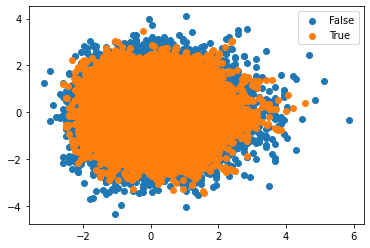

In [0]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_resampled)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_resampled == label)[0]
	pyplot.scatter(X_resampled[row_ix, 0], X_resampled[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

This is what SMOTE do to the minority label, it matches the number of labels from the higher class.

# Dummy Classifier

 Before building or **XGBoost** model let's build a dummy classifier model, why?

Because **DummyClassifier** is a classifier that makes predictions using simple rules. This classifier is useful as a simple baseline to compare with other (real) classifiers. 

Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).  


In [0]:
# installing librarie
!pip install scikit-plot

MATTHEWS CORRELATION COEFFICIENT:
0.0 

CLASSIFICATION REPORT DUMMY_CLASSIFIER
              precision    recall  f1-score   support

       False       0.84      1.00      0.92      8818
        True       0.00      0.00      0.00      1618

    accuracy                           0.84     10436
   macro avg       0.42      0.50      0.46     10436
weighted avg       0.71      0.84      0.77     10436

AxesSubplot(0.125,0.125;0.62x0.755)


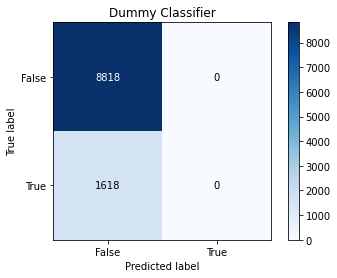

In [0]:
# importing the librarie
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, matthews_corrcoef
import scikitplot as skplt

# training or model
dummy = DummyClassifier(strategy= 'most_frequent')
dummy.fit(X_train, y_train)

# testing our model
y_dummy = dummy.predict(X_test)

# matthews correlation coeficient
print('MATTHEWS CORRELATION COEFFICIENT:')
print(matthews_corrcoef(y_test, y_dummy),'\n')

# Model Evaluation metrics 
print('CLASSIFICATION REPORT DUMMY_CLASSIFIER')
print(classification_report(y_test, y_dummy))

# Dummy Classifier Confusion matrix
print(skplt.metrics.plot_confusion_matrix(y_test, y_dummy,  title='Dummy Classifier'))

One of the metrics that I used called the [Matthews correlation coefficient (MCC)](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) is used in machine learning as a measure of the quality of binary (two-class) classifications.  

The MMC ranges between -1 and 1, in our two-class classification, where worst value = −1 and best value = +1. 

In our `Dummy Classifier` model, our MMC was 0 (zero) which is not good enough even with 84% accuracy.

Let's remember that `True` label refers to the client that failed to meet the legal obligations and `False` label is basically the opposite.

So as we can observe from our confusion matrix our Dummy CLassifier did not predict any `True` labels that's why in the classification report label `True` is zero for **precision**, **recall**, **f1-score**.

Basically, our model 84% accuracy did not mean much since it can't predict `True` labels, which is exactly what we want to avoid in our business case. 

# Gradient Boosting

I decided to run a Gradient Boosting to see if we could predict any `True` labels since our `Dummy Classifier` did not predict any, so we can also use this powerful model as another baseline to compare with `XGBoost`.

MATTHEWS CORRELATION COEFFICIENT:
0.14993675735635845 

CLASSIFICATION REPORT GRADIENT BOOST
              precision    recall  f1-score   support

       False       0.86      0.98      0.91      8818
        True       0.43      0.10      0.17      1618

    accuracy                           0.84     10436
   macro avg       0.64      0.54      0.54     10436
weighted avg       0.79      0.84      0.80     10436

AxesSubplot(0.125,0.125;0.62x0.755)


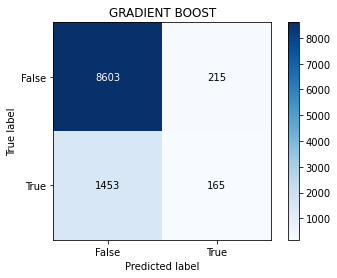

In [0]:
# importing the librarie
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier as GBC 

# creating our model
gbc_model = GBC(random_state=42)

# training our model
gbc_model.fit(X_resampled, y_resampled)

# testing our model
y_gbc = gbc_model.predict(X_test)

# matthews correlation coeficient
print('MATTHEWS CORRELATION COEFFICIENT:')
print(matthews_corrcoef(y_test, y_gbc),'\n')

# Model Evaluation metrics 
print('CLASSIFICATION REPORT GRADIENT BOOST')
print(classification_report(y_test, y_gbc))

# GBC Confusion matrix
print(skplt.metrics.plot_confusion_matrix(y_test, y_gbc, title='GRADIENT BOOST'))


Our MMC was about 0,15 a lot better than our Dummy Classifier.

Looking at the confusion matrix we can see that this powerful model predicted some `True` labels. It performed with 84% accuracy.

But take a look at recall from True labels. The question here is: Of all the clients that truly default, how many did we label? 

And the answer was only about 0.09 = 9%.

For our business case, we want to predict more `True` labels correct as possible avoiding default.

# XGBoost

As I mentioned before we are going to use XGBoost to build or classification model. XGboost as it says in its documentation: ["is an optimized distributed gradient boosting library designed to be highly **efficient**, **flexible** and **portable**."](https://xgboost.readthedocs.io/en/latest/index.html).

It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way."

Before I started to build our `XGBoost` model, in the documentation says when we have unbalanced classes we should use the parameter `scale_pos_weight` which by default is 1.

A typical value to consider is : 

**sum(negative instances) / sum(positive instances)**

In [0]:
# import librarie
from collections import Counter
# count examples in each class
counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.208


After  a lot of experiments, the best value for our `scaled_pos_weight` that I find was 2.5 and this is the value that I'm using to tune the model.

MATTHEWS CORRELATION COEFFICIENT:
0.23038857283084455 

CLASSIFICATION REPORT XGBOOST
              precision    recall  f1-score   support

       False       0.87      0.92      0.90      8818
        True       0.40      0.27      0.32      1618

    accuracy                           0.82     10436
   macro avg       0.63      0.60      0.61     10436
weighted avg       0.80      0.82      0.81     10436

AxesSubplot(0.125,0.125;0.62x0.755)


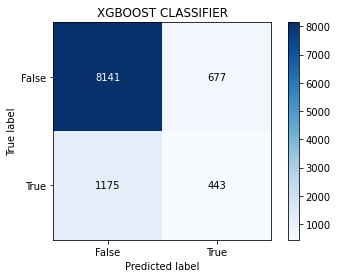

In [0]:
# importing the librarie
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef

# creating our model
xgb_model = XGBClassifier(scale_pos_weight=2.5,                          
                          random_state=42
                          )

# training the model
xgb_model.fit(X_train, y_train)

# testing the model
y_xbg = xgb_model.predict(X_test)

# matthews correlation coeficient
print('MATTHEWS CORRELATION COEFFICIENT:')
print(matthews_corrcoef(y_test, y_xbg),'\n')

# Model Evaluation metrics 
print('CLASSIFICATION REPORT XGBOOST')
print(classification_report(y_test,y_xbg))

# XGB Confusion matrix
print(skplt.metrics.plot_confusion_matrix(y_test, y_xbg, title='XGBOOST CLASSIFIER'))

## Estimators

Let's search for the best estimators

Best: -0.456560 using {'n_estimators': 500}
-0.462865 (0.002560) with: {'n_estimators': 50}
-0.458620 (0.002769) with: {'n_estimators': 100}
-0.457876 (0.003079) with: {'n_estimators': 150}
-0.457377 (0.003303) with: {'n_estimators': 200}
-0.457088 (0.003375) with: {'n_estimators': 250}
-0.457043 (0.003225) with: {'n_estimators': 300}
-0.456783 (0.003234) with: {'n_estimators': 350}
-0.456794 (0.003230) with: {'n_estimators': 400}
-0.456586 (0.003410) with: {'n_estimators': 450}
-0.456560 (0.003127) with: {'n_estimators': 500}


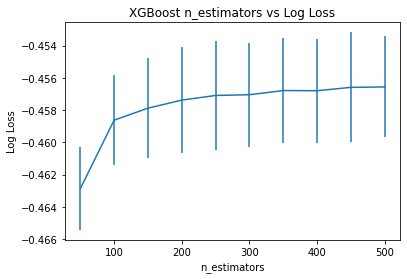

In [0]:
# XGBoost Tune n_estimators
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

# grid search
model = XGBClassifier(scale_pos_weight=2.5)
n_estimators = range(50, 501, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

As we can see from the results the best one came from using 500 `n_estimators` but looking at the chart we can see that after 300 we don't see much improvement.

## Max Depth

The next parameter to tune is `max_deph` with refers to the maximum depth of a tree. We must be careful because increasing too much this value can make the model more complex and more likely to overfit.

range(1, 11)
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 17.0min finished


Best: -0.444396 using {'max_depth': 6}
-0.460090 (0.002858) with: {'max_depth': 1}
-0.458755 (0.003006) with: {'max_depth': 2}
-0.456560 (0.003127) with: {'max_depth': 3}
-0.453389 (0.002179) with: {'max_depth': 4}
-0.449150 (0.002835) with: {'max_depth': 5}
-0.444396 (0.002103) with: {'max_depth': 6}
-0.446444 (0.002416) with: {'max_depth': 7}
-0.459613 (0.005025) with: {'max_depth': 8}
-0.483801 (0.004362) with: {'max_depth': 9}
-0.508715 (0.007571) with: {'max_depth': 10}


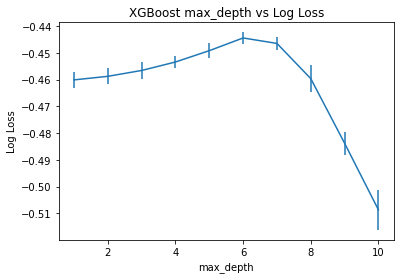

In [0]:
# XGBoost Tune max_depth

# grid search
model = XGBClassifier(scale_pos_weight=2.5,
                      n_estimators = 500,
                      )
max_depth = range(1, 11, 1)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

By the results, the best `max_depht` was 6 and we run the test with 500 `n_estimators`.

## Estimators and Max Depth

Let's run a Grid Search from both parameters together to see the best combination and see the results.

[2, 4, 6, 8]
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 20.4min finished




Best: -0.438937 using {'max_depth': 8, 'n_estimators': 300}
-0.457954 (0.002920) with: {'max_depth': 2, 'n_estimators': 300}
-0.457861 (0.003036) with: {'max_depth': 2, 'n_estimators': 400}
-0.457841 (0.003146) with: {'max_depth': 2, 'n_estimators': 500}
-0.457841 (0.003146) with: {'max_depth': 2, 'n_estimators': 500}
-0.453448 (0.001630) with: {'max_depth': 4, 'n_estimators': 300}
-0.452105 (0.001771) with: {'max_depth': 4, 'n_estimators': 400}
-0.451240 (0.002047) with: {'max_depth': 4, 'n_estimators': 500}
-0.451240 (0.002047) with: {'max_depth': 4, 'n_estimators': 500}
-0.444069 (0.001722) with: {'max_depth': 6, 'n_estimators': 300}
-0.442666 (0.002345) with: {'max_depth': 6, 'n_estimators': 400}
-0.442514 (0.003183) with: {'max_depth': 6, 'n_estimators': 500}
-0.442514 (0.003183) with: {'max_depth': 6, 'n_estimators': 500}
-0.438937 (0.002710) with: {'max_depth': 8, 'n_estimators': 300}
-0.446119 (0.002793) with: {'max_depth': 8, 'n_estimators': 400}
-0.457012 (0.002938) with: {

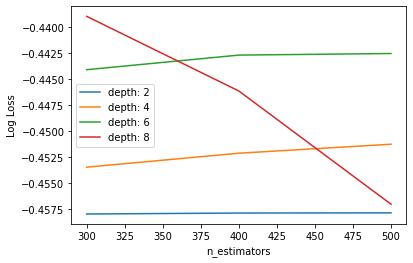

In [0]:
# XGBoost, Tune n_estimators and max_depth

# grid search
model = XGBClassifier(scale_pos_weight=2.5)
n_estimators = [300,400, 500, 500]
max_depth = [2, 4, 6, 8]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("\n\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_max_depth.png')

Our model ran 80 fits and the best combination was:

* `n_estimators`: 300
* `max_depth`: 8
* `scale_pos_weight`: 2,5

Based on these parameters let's run a final Grid Search for other parameters and build our final model.

## Final model with Grid Search

After that search let's build our final model using Grid Search and 5 kFold to validate our model.

In [0]:
# Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer

# Create model
xgb_model = XGBClassifier(n_estimators=300, 
                          scale_pos_weight=2.7,
                          max_depth=8)

# Define our search space for grid search
search_space = [{'learning_rate': [0.001,0.01, 0.1, 0.2],
                 'colsample_bytree': [i/10.0 for i in range(1, 3)],
                 'gamma': [i/10.0 for i in range(3)],
                 'k': [10]}]

# Define cross validation
kfold = KFold(n_splits=5, random_state=42)

# AUC and accuracy as score
scoring = {'AUC':'roc_auc', 'Accuracy':make_scorer(accuracy_score)}

# Define grid search
grid = GridSearchCV(xgb_model,
                    param_grid=search_space,
                    cv=kfold,
                    scoring=scoring,
                    refit='AUC',
                    verbose=1,
                    n_jobs=-1)

# Fit grid search
model_final = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.9min finished


Metrics results from best XGBoost Model
---------------------------------------

{'colsample_bytree': 0.2, 'gamma': 0.1, 'k': 10, 'learning_rate': 0.01} 

MATTHEWS CORRELATION COEFFICIENT:
0.18739544279752118 

CLASSIFICATION REPORT XGBOOST
              precision    recall  f1-score   support

       False       0.86      0.98      0.91      8818
        True       0.50      0.12      0.19      1618

    accuracy                           0.84     10436
   macro avg       0.68      0.55      0.55     10436
weighted avg       0.80      0.84      0.80     10436

AxesSubplot(0.125,0.125;0.62x0.755)


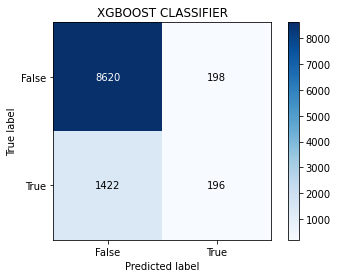

In [0]:
# predictions from best model
predict = model_final.predict(X_test)

# show metrics the results
print('Metrics results from best XGBoost Model')
print('---------------------------------------\n')

# show best parameters
print(model_final.best_params_, '\n')

# matthews correlation coeficient
print('MATTHEWS CORRELATION COEFFICIENT:')
print(matthews_corrcoef(y_test, predict),'\n')

# Model Evaluation metrics 
print('CLASSIFICATION REPORT XGBOOST')
print(classification_report(y_test, predict))

# XGB Confusion matrix
print(skplt.metrics.plot_confusion_matrix(y_test, predict, title='XGBOOST CLASSIFIER'))

As we can see from the results our model has had basically the same accuracy compared to the other models but we have improved the other metrics for the `true` label which is great for our business point of view.

# Conclusion 

Since we did not have any explanation or documentation about our data set we were able to create an algorithm with great performance.

We can see that using only the accuracy as metrics can make us take wrong decisions about the model that will be put into production.

Machine learning can be improved by having more data or using [`Feature engineering`](https://en.wikipedia.org/wiki/Feature_engineering).